In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as ras, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Generate the dataset
num_samples = 1000
data = {
    'step': np.random.randint(1, 500, num_samples),
    'type': np.random.choice(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], num_samples),
    'amount': np.round(np.random.uniform(0.01, 1000000, num_samples), 2),
    'nameOrig': ['C' + str(np.random.randint(1000000000, 9999999999, dtype=np.int64)) for _ in range(num_samples)],
    'oldbalanceOrg': np.round(np.random.uniform(0, 5000000, num_samples), 2),
    'newbalanceOrig': np.round(np.random.uniform(0, 5000000, num_samples), 2),
    'nameDest': ['M' + str(np.random.randint(1000000000, 9999999999, dtype=np.int64)) for _ in range(num_samples)],
    'oldbalanceDest': np.round(np.random.uniform(0, 5000000, num_samples), 2),
    'newbalanceDest': np.round(np.random.uniform(0, 5000000, num_samples), 2),
    'isFraud': np.random.choice([0, 1], num_samples, p=[0.995, 0.005])
}
df = pd.DataFrame(data)
df.to_csv('transaction_fraud_detection.csv', index=False)
print("Sample dataset saved as 'transaction_fraud_detection.csv'")


Sample dataset saved as 'transaction_fraud_detection.csv'


In [2]:
import pandas as pd
import numpy as np
# Load the dataset
df_loaded = pd.read_csv('transaction_fraud_detection.csv')

# Display the first few row
print(df_loaded.head())

   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0    13   PAYMENT  282069.93  C7094475113     4060208.78      2139318.99   
1    70  TRANSFER  895889.14  C9386316329     4083298.71       597700.64   
2   148  TRANSFER  392466.91  C4504490609      571597.10      2339881.61   
3    80   PAYMENT  946354.57  C8464392207      735956.58       866886.86   
4   374  CASH_OUT  602119.26  C6588101404     1319218.13      3250923.63   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M8534796458      4214241.22       433280.89        0  
1  M9966878941      1416515.05      4999040.96        0  
2  M1487508091      1865231.55      2132221.78        0  
3  M8812313755      1942545.37      2607835.12        0  
4  M7808719513      1535609.66       238588.54        0  


In [3]:
df_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1000 non-null   int64  
 1   type            1000 non-null   object 
 2   amount          1000 non-null   float64
 3   nameOrig        1000 non-null   object 
 4   oldbalanceOrg   1000 non-null   float64
 5   newbalanceOrig  1000 non-null   float64
 6   nameDest        1000 non-null   object 
 7   oldbalanceDest  1000 non-null   float64
 8   newbalanceDest  1000 non-null   float64
 9   isFraud         1000 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 78.2+ KB


In [4]:
df_loaded.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,250.137000,485577.821650,2.511015e+06,2.503167e+06,2.540508e+06,2.479569e+06,0.005000
std,148.759758,290636.924891,1.443093e+06,1.432357e+06,1.440683e+06,1.436407e+06,0.070569
min,2.000000,456.250000,5.334370e+03,4.416610e+03,1.345390e+03,1.027500e+03,0.000000
25%,113.000000,236755.455000,1.309055e+06,1.307610e+06,1.348132e+06,1.226297e+06,0.000000
50%,258.500000,466589.890000,2.515523e+06,2.450888e+06,2.524974e+06,2.511180e+06,0.000000
75%,380.000000,734900.580000,3.705334e+06,3.765771e+06,3.817510e+06,3.700228e+06,0.000000
max,499.000000,999944.330000,4.977004e+06,4.996878e+06,4.993442e+06,4.999041e+06,1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Exploratory Data Analysis (EDA)
obj = (df_loaded.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df_loaded.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df_loaded.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 0
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

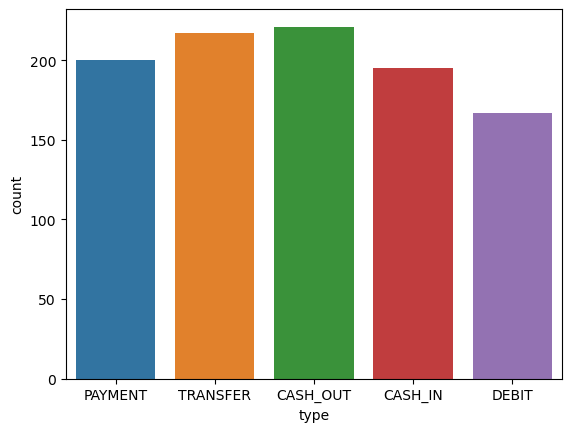

In [7]:
sns.countplot(x='type', data=df_loaded)

<Axes: xlabel='type', ylabel='amount'>

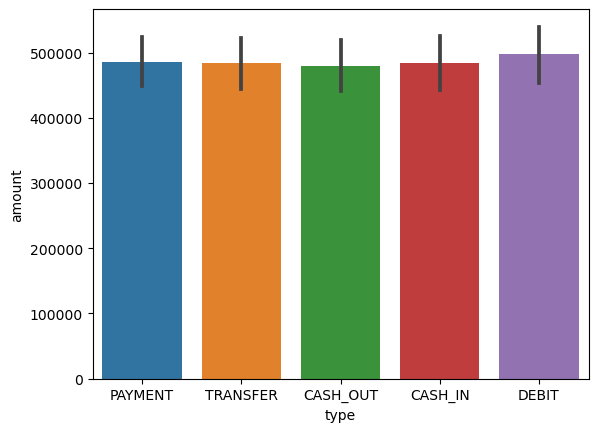

In [8]:
sns.barplot(x='type', y='amount', data=df_loaded)

In [9]:
df_loaded['isFraud'].value_counts()

0    995
1      5
Name: isFraud, dtype: int64

C:\Users\Kirti Jadhav\AppData\Local\Temp\ipykernel_32284\48261129.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_loaded['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

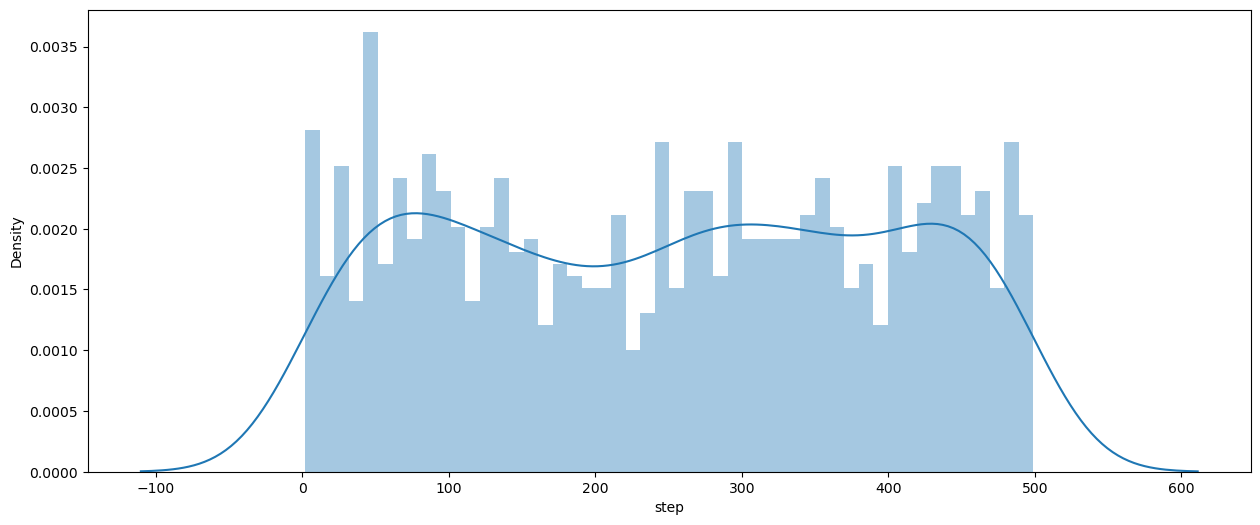

In [10]:
plt.figure(figsize=(15, 6))
sns.distplot(df_loaded['step'], bins=50)

C:\Users\Kirti Jadhav\AppData\Local\Temp\ipykernel_32284\1310710649.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_loaded.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)


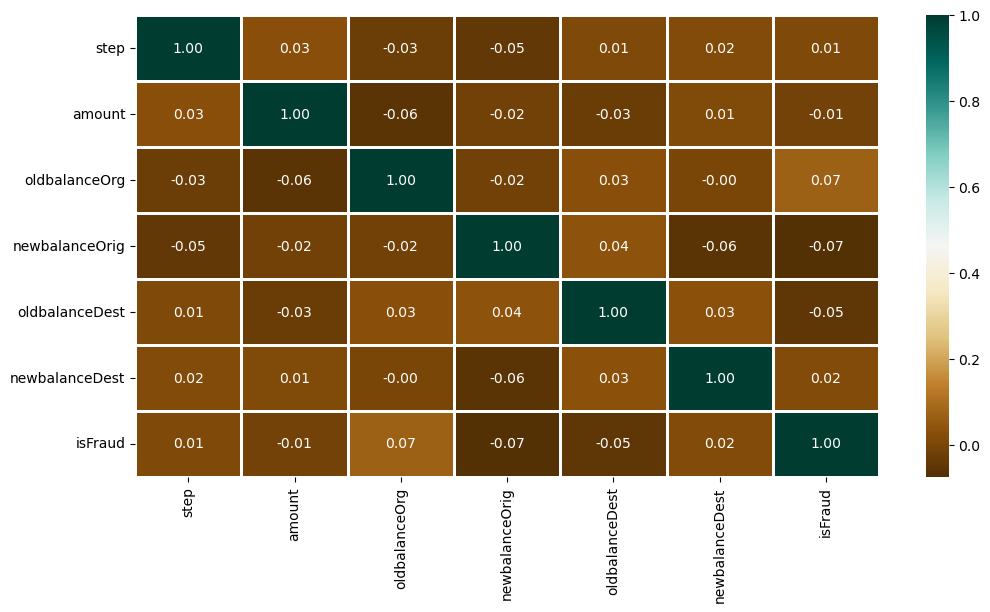

In [11]:
# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_loaded.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.show()

In [12]:
# Data Preprocessing
type_new = pd.get_dummies(df_loaded['type'], drop_first=True)
data_new = pd.concat([df_loaded, type_new], axis=1).drop(['type', 'nameOrig', 'nameDest'], axis=1)

In [13]:
# Split data into features and target
X = data_new.drop('isFraud', axis=1)
y = data_new['isFraud']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    if len(np.unique(y_test)) > 1:  # Check if there is more than one class present
        roc_auc = ras(y_test, y_pred_proba)
        print(f"{name} ROC AUC Score: {roc_auc}")
    else:
        print(f"{name}: Only one class present in y_true, ROC AUC score is not defined.")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


Logistic Regression ROC AUC Score: 0.5771812080536913
Logistic Regression Accuracy: 0.9933333333333333
SVM ROC AUC Score: 0.5134228187919463
SVM Accuracy: 0.9933333333333333
Random Forest ROC AUC Score: 0.4228187919463087
Random Forest Accuracy: 0.9933333333333333
